In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
df = pd.read_csv('adult.data' , header = None , names = ['Age' , 'Work-class' , 'Final-weight' , 'Education' ,'Education-num' ,'Marital-status' , 'Occupation' , 'Relationship' , 'Race' , 'Sex' , 'Capital-gain' , 'Capital-loss' , 'Hours-per-week' , 'Native-county' , 'Income' ])               

In [26]:
df.head(2)

,Age,Work-class,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-county,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [27]:
def wihte_space(data):
    for i in data.columns:
        if data[i].dtypes == 'object':
            data[i] = data[i].map(str.strip)
            return data
        else:
            pass
wihte_space(df)

,Age,Work-class,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-county,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
df.head(2)

,Age,Work-class,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-county,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [29]:
#data Cleaning Part 

In [30]:
df.drop_duplicates(keep = 'first' , inplace  = True)

In [31]:
df.isna().sum()

Age               0
Work-class        0
Final-weight      0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-county     0
Income            0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Work-class      32537 non-null  object
 2   Final-weight    32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education-num   32537 non-null  int64 
 5   Marital-status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital-gain    32537 non-null  int64 
 11  Capital-loss    32537 non-null  int64 
 12  Hours-per-week  32537 non-null  int64 
 13  Native-county   32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [34]:
df.columns

Index(['Age', 'Work-class', 'Final-weight', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-county',
       'Income'],
      dtype='object')

In [35]:
Numerical_columns = []
categorical_columns = []

for col in df.columns:
    if df[col].dtypes == "object":
        categorical_columns.append(col)
    
    else:
        Numerical_columns.append(col)

print(Numerical_columns )
print(categorical_columns )



['Age', 'Final-weight', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
['Work-class', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-county', 'Income']


In [36]:
Numerical_columns


['Age',
 'Final-weight',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

In [37]:
categorical_columns

['Work-class',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-county',
 'Income']

In [74]:
df.shape

(32537, 15)

# obeservation

### 32537 record in this dataset.
## 15 columns 
### categorical columns = 9
### numerical columns = 6


In [38]:
df.head(2)

,Age,Work-class,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-county,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [40]:
#categorcal value count

for col in categorical_columns:
    print(f'{col} : {df[col].value_counts(normalize = True)}')
    print("*******************************************************************************")

Work-class : Private             0.696837
Self-emp-not-inc    0.078065
Local-gov           0.064327
?                   0.056428
State-gov           0.039893
Self-emp-inc        0.034299
Federal-gov         0.029505
Without-pay         0.000430
Never-worked        0.000215
Name: Work-class, dtype: float64
*******************************************************************************
Education :  HS-grad         0.322525
 Some-college    0.223807
 Bachelors       0.164520
 Masters         0.052924
 Assoc-voc       0.042475
 11th            0.036113
 Assoc-acdm      0.032793
 10th            0.028675
 7th-8th         0.019824
 Prof-school     0.017703
 9th             0.015797
 12th            0.013308
 Doctorate       0.012693
 5th-6th         0.010204
 1st-4th         0.005102
 Preschool       0.001537
Name: Education, dtype: float64
*******************************************************************************
Marital-status :  Married-civ-spouse       0.460092
 Never-married       

<AxesSubplot:title={'center':'Income Pie Chart'}, ylabel='Income'>

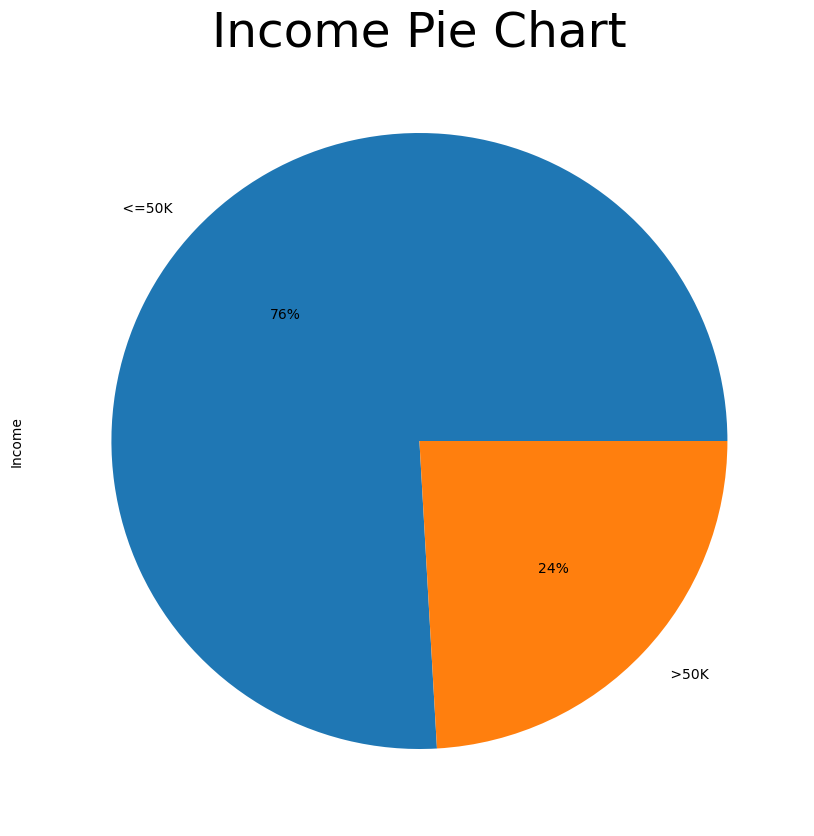

In [53]:
## income feature value count
plt.figure(figsize = (10,10))
plt.title('Income Pie Chart' , fontsize = 35)
df['Income'].value_counts().plot.pie(autopct='%1.0f%%')

# obeservation

### pepole income less than 50k is 76%
### pepole income more than 50k is 24%



In [54]:
df.head(2)

,Age,Work-class,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-county,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [88]:
df["Work-class"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [89]:
df['Work-class'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Work-class, dtype: int64

In [91]:
df["Work-class"] =df["Work-class"].str.replace("?" , "Private")

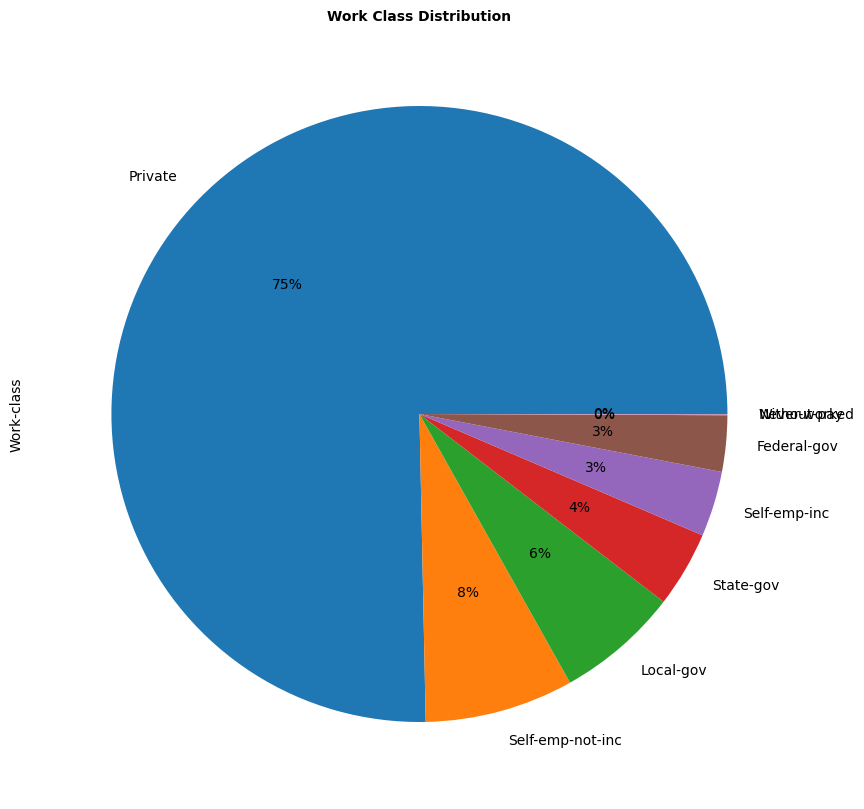

In [102]:
plt.figure(figsize = (10,10))
plt.title('Work Class Distribution' , fontweight = 'bold' , fontsize = 10)
df['Work-class'].value_counts().plot.pie(autopct='%1.0f%%')
plt.xticks(rotation = 90)
plt.show()

# Obeservation 
### private sector Work Class = 75%
### Self-emp-not-inc work Class = 8%
### Local gov work class  = 6%
### State gov work class = 4%

### Most for pepole work in Private sector Job

In [104]:
workclass = df.groupby("Work-class")["Income"].value_counts()

In [105]:
workclass

Work-class        Income
Federal-gov        <=50K      589
                   >50K       371
Local-gov          <=50K     1476
                   >50K       617
Never-worked       <=50K        7
Private            <=50K    19357
                   >50K      5152
Self-emp-inc       >50K       622
                   <=50K      494
Self-emp-not-inc   <=50K     1816
                   >50K       724
State-gov          <=50K      945
                   >50K       353
Without-pay        <=50K       14
Name: Income, dtype: int64

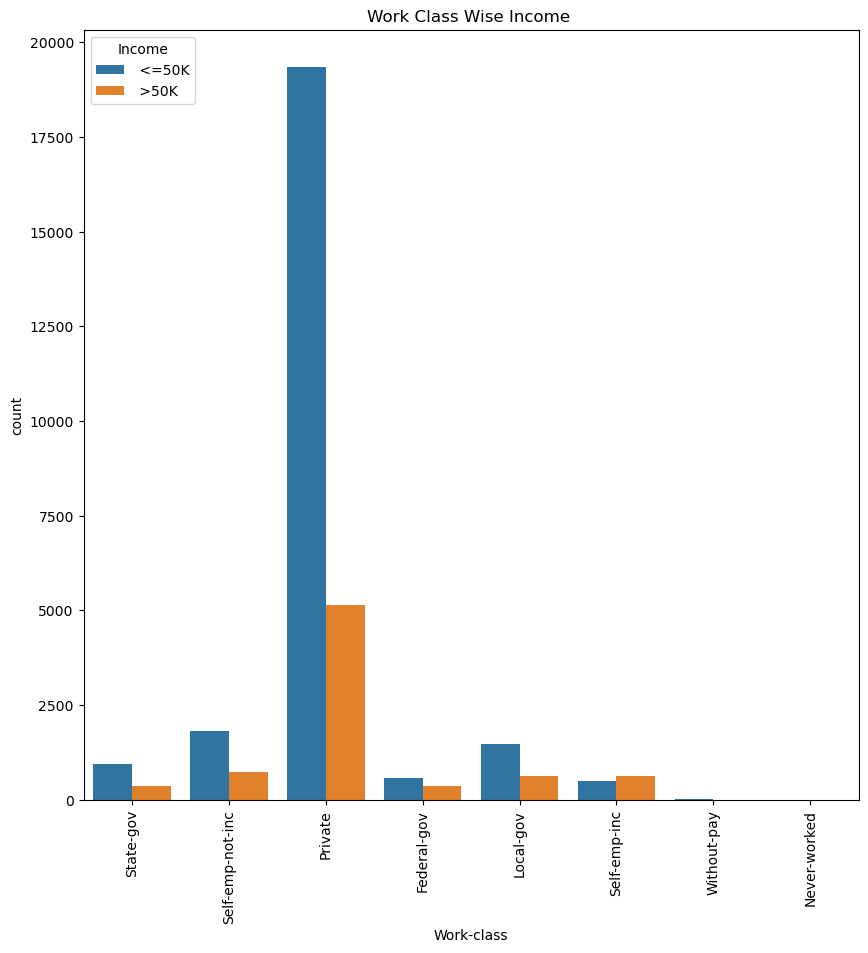

In [119]:
plt.figure(figsize = (10,10))
plt.title("Work Class Wise Income ")
sns.countplot(x = df['Work-class'] , hue = df["Income"])
plt.xticks(rotation = 90)
plt.show()

# Obeservation

### private sector most of people income is  less than 50k

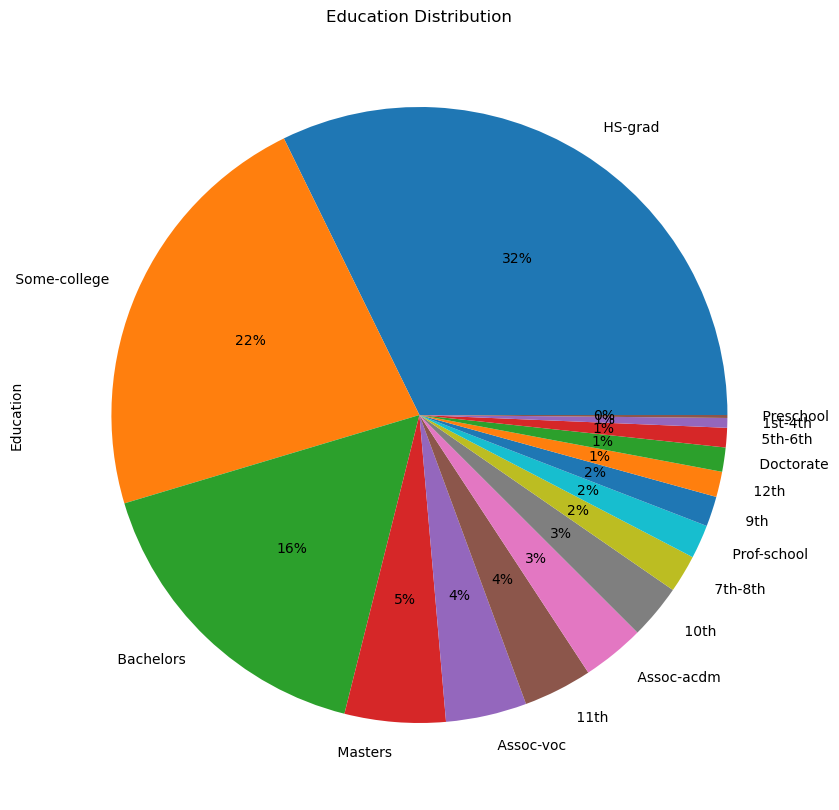

In [127]:
plt.figure(figsize = (10,10))
plt.title("Education Distribution")
df["Education"].value_counts().plot.pie(autopct = '%1.0f%%')
plt.xticks(rotation = 80)
plt.show()

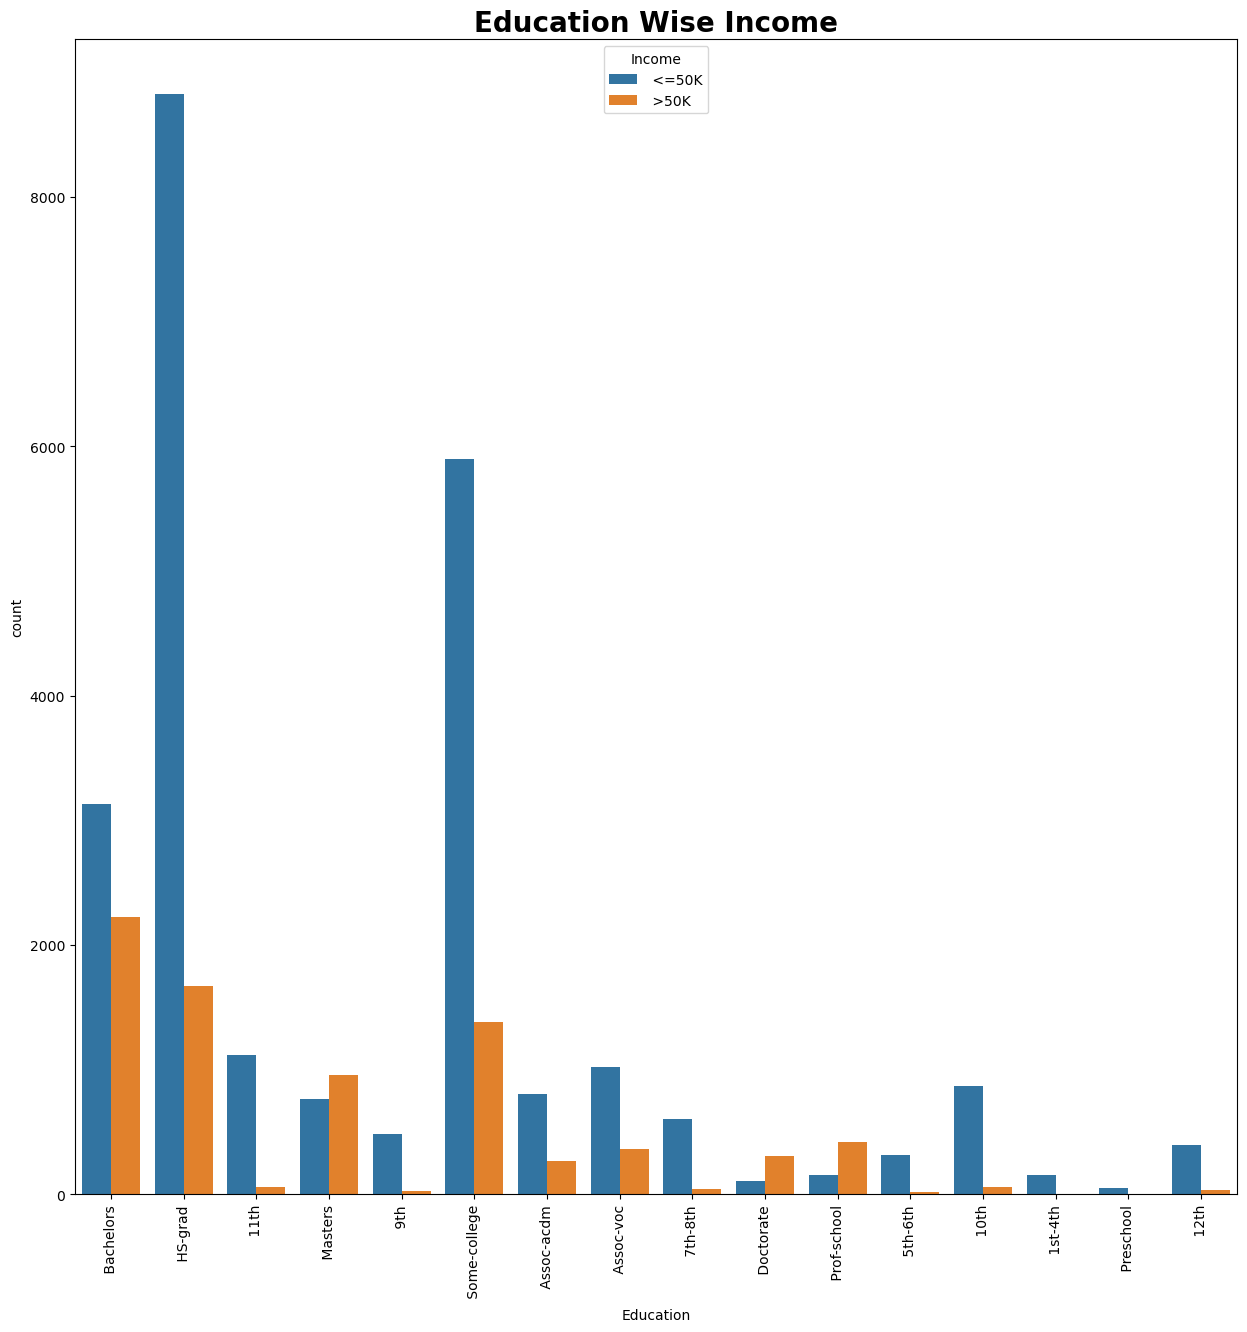

In [130]:
plt.figure(figsize = (15,15))
plt.title("Education Wise Income" , fontweight = 'bold' , fontsize = 20)
sns.countplot(x = df["Education"] , hue = df["Income"])
plt.xticks(rotation = 90)
plt.show()

# Obeservation

### Hs-grad , some-college , Bachelors , 10th  ,11th  passout people eran money less than 50k.
### masters , Doctorate prof_school people eran money more than 50k.

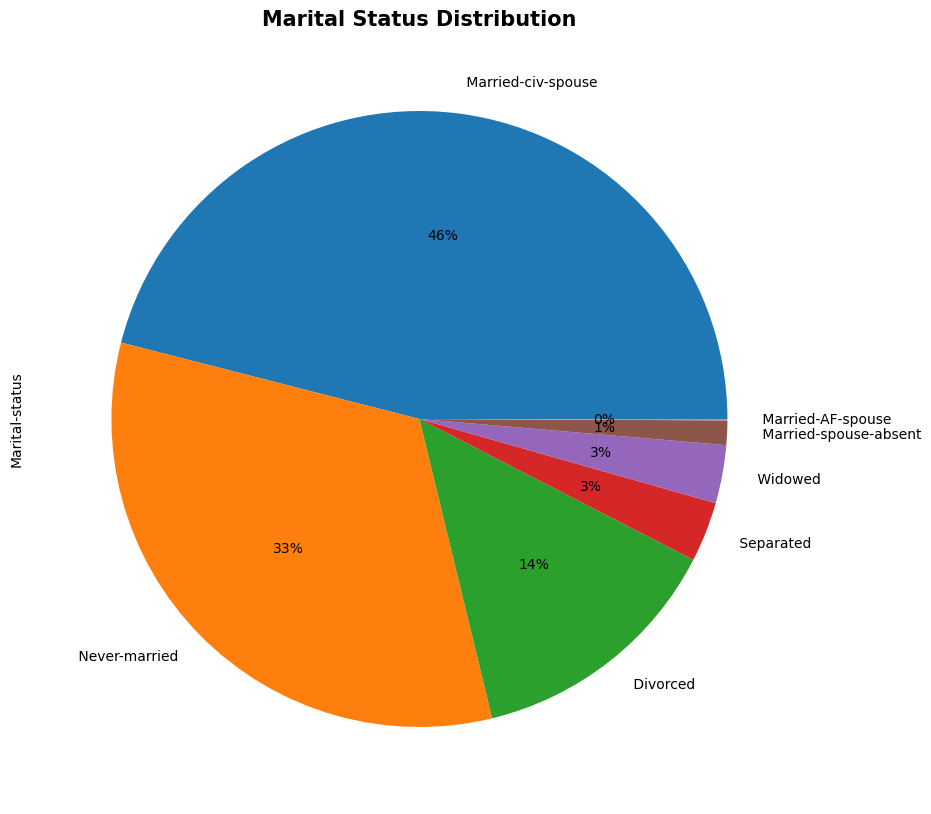

In [134]:
plt.figure(figsize = (10,10))
df['Marital-status'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Marital Status Distribution' , fontweight = 'bold' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

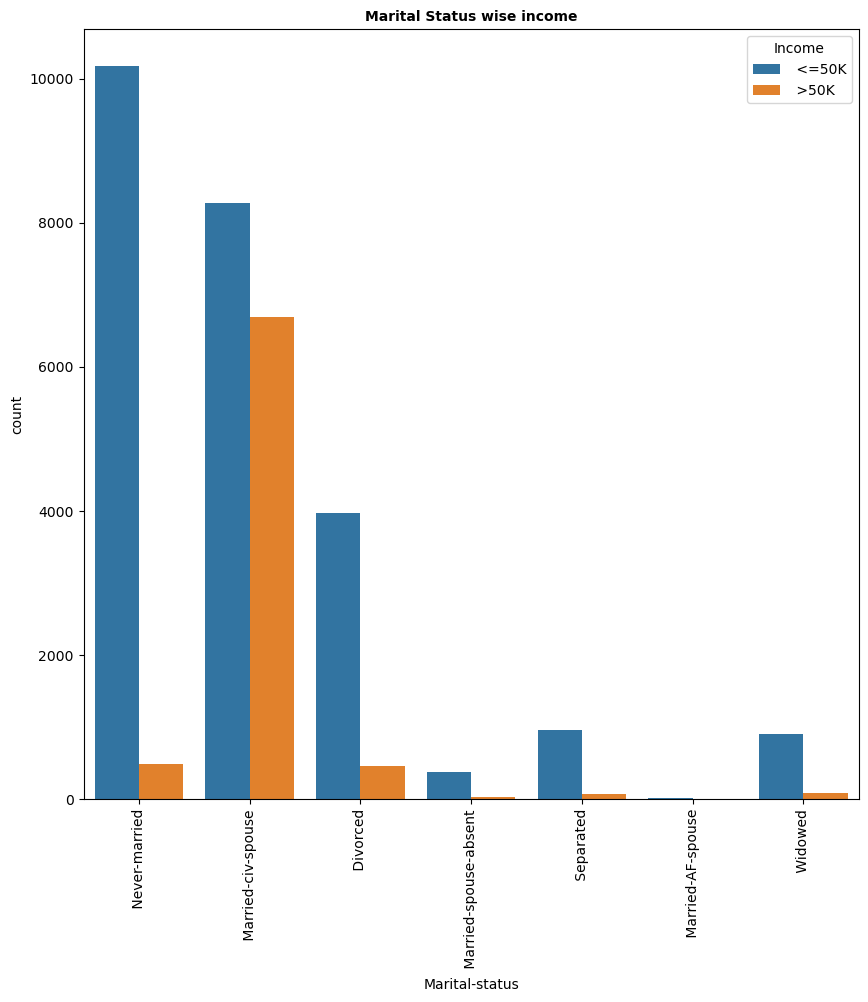

In [137]:
plt.figure(figsize = (10,10))
plt.title("Marital Status wise income" , fontweight = 'bold' , fontsize = 10)
sns.countplot(x=df["Marital-status"] , hue = df['Income'])
plt.xticks(rotation = 90)
plt.show()

# Obeservation
### Nevver Married , Married Civ Spouse , Divorced people income is less than 50K.
### never Married people is highest Worker in data set.

In [146]:
df["Occupation"] = df["Occupation"].str.replace('?' , "Craft-repair")

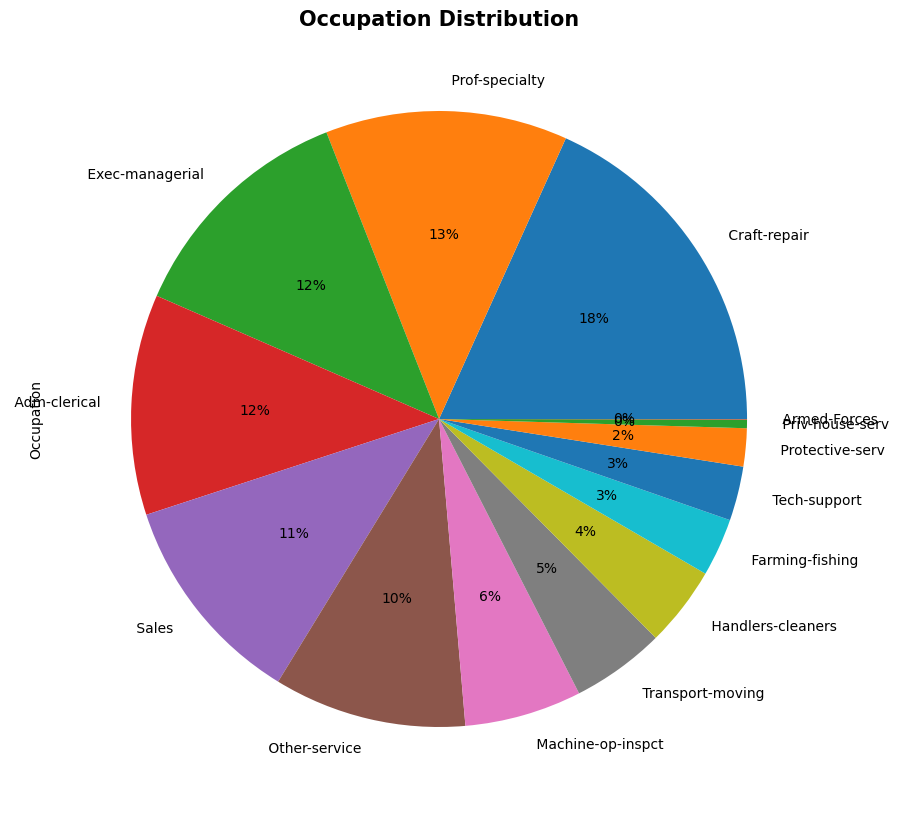

In [147]:
plt.figure(figsize = (10,10))
plt.title("Occupation Distribution" , fontweight = 'bold' , fontsize = 15)
df['Occupation'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.xticks(rotation = 90)
plt.show()

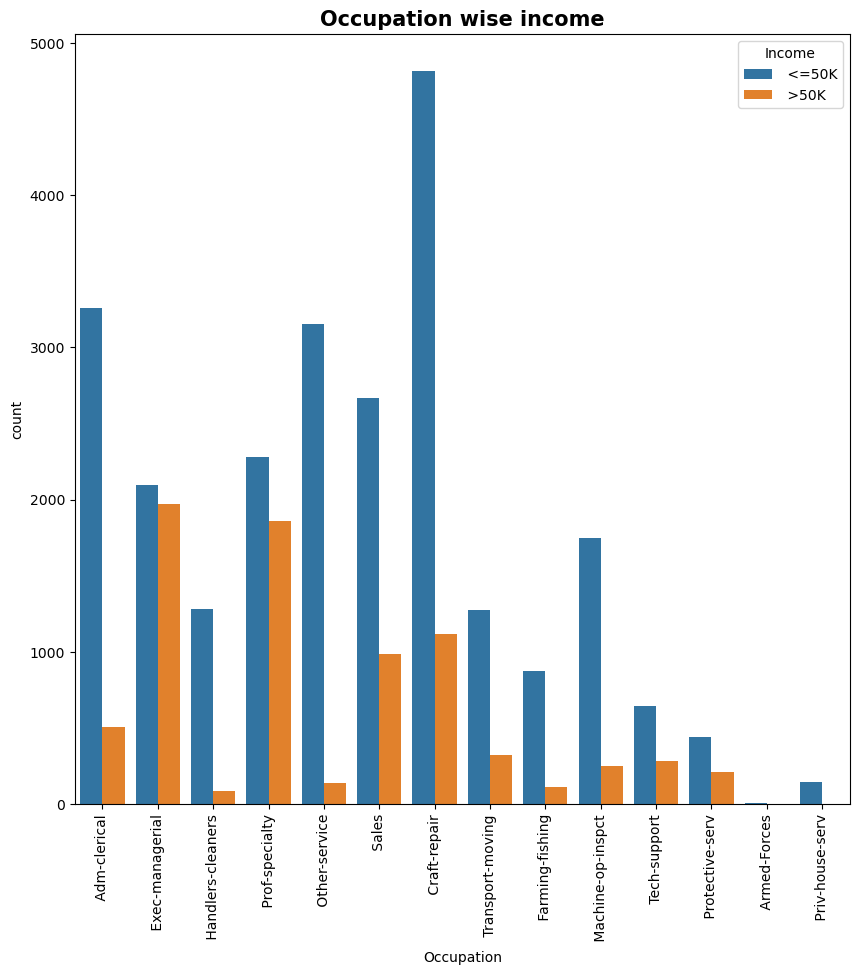

In [149]:
plt.figure(figsize = (10,10))
plt.title("Occupation wise income" , fontweight = 'bold' , fontsize = 15)
sns.countplot(x = df['Occupation'] , hue = df["Income"])
plt.xticks(rotation = 90)
plt.show()

# Obeservation

### adm-clerical , exec managerial , craft-repair , sales income is less than 50k.


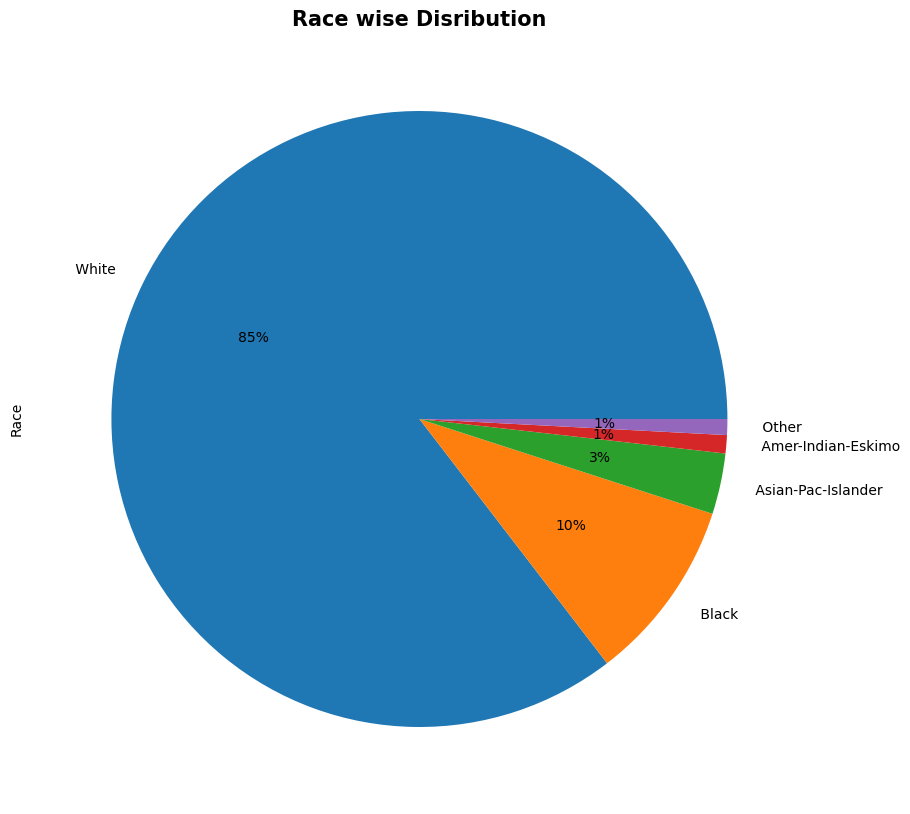

In [156]:
plt.figure(figsize = (10,10))
plt.title('Race wise Disribution' , fontweight = 'bold' , fontsize = 15)
df['Race'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.xticks(rotation = 90)
plt.show()

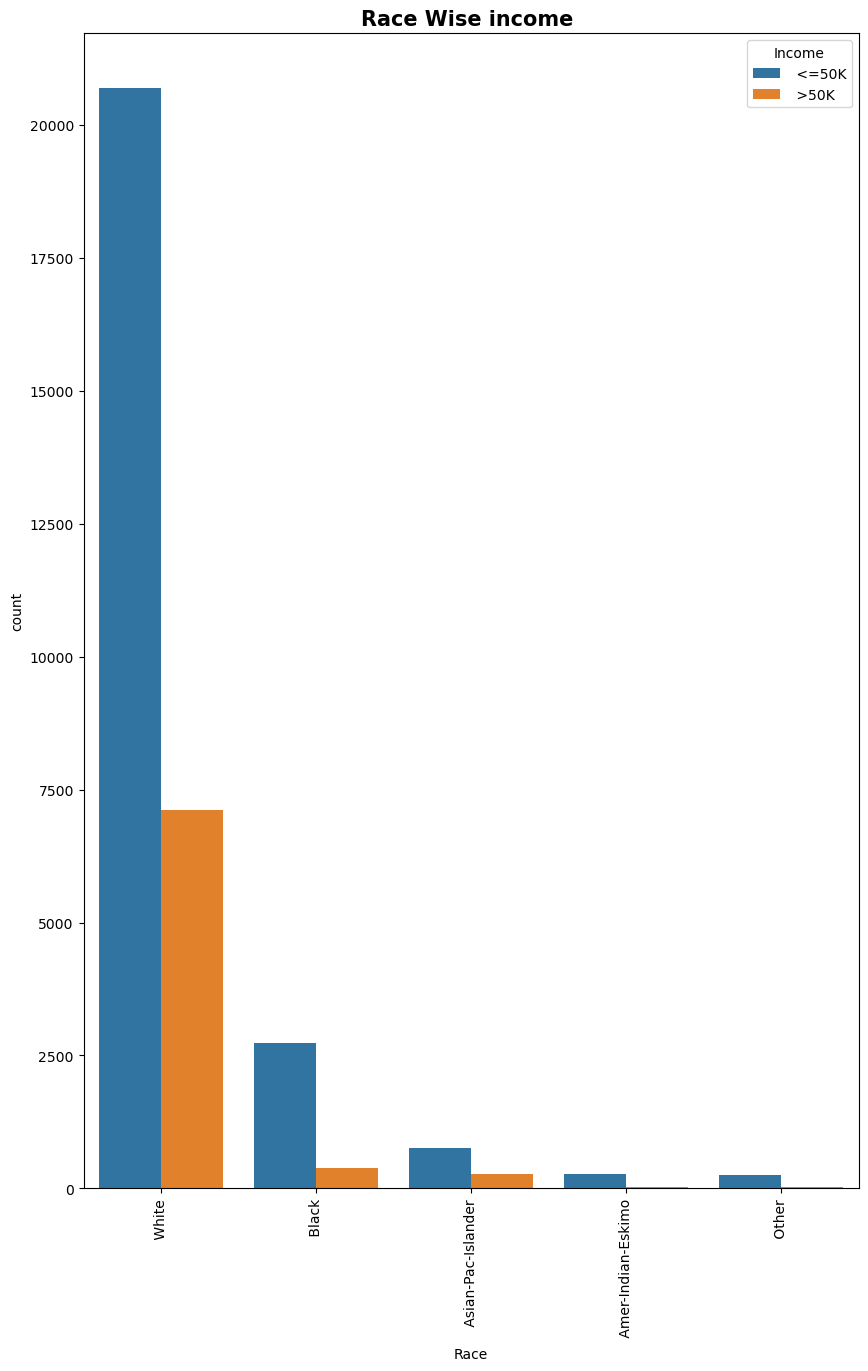

In [158]:
plt.figure(figsize = (10,15))
plt.title("Race Wise income " , fontweight = 'bold' , fontsize = 15)
sns.countplot(x=df["Race"] , hue = df['Income'])
plt.xticks(rotation = 90)
plt.show()


# Obeservation
### white people is height employee in US.
### white, Black , Asian-Pac-islander income is less than 50k.

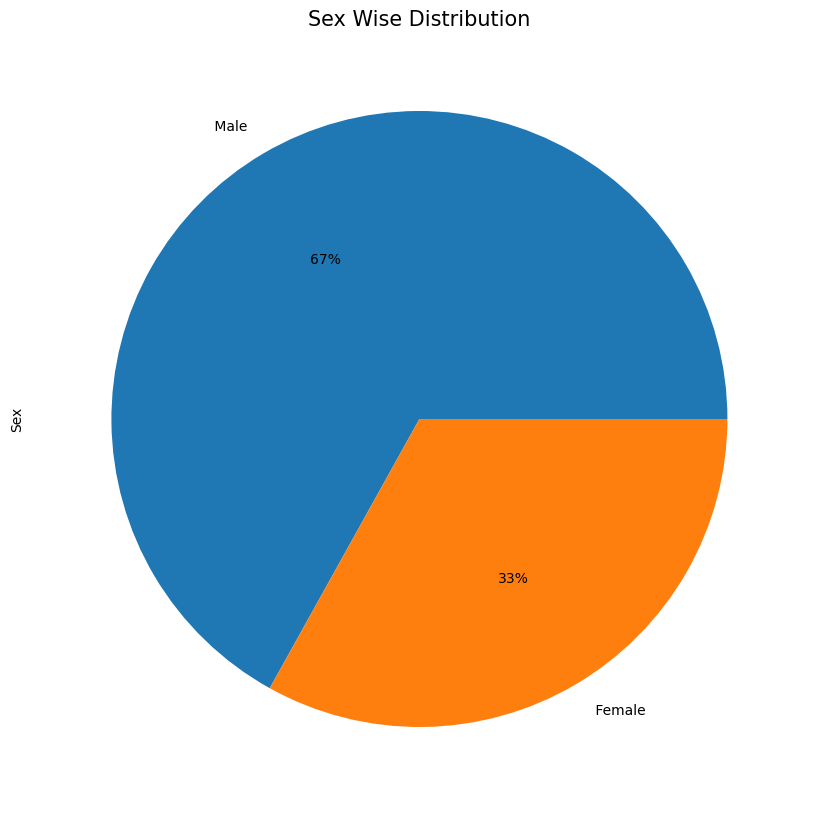

In [166]:
plt.figure(figsize =(10,10))
plt.title("Sex Wise Distribution" , fontsize = 15)
df["Sex"].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()

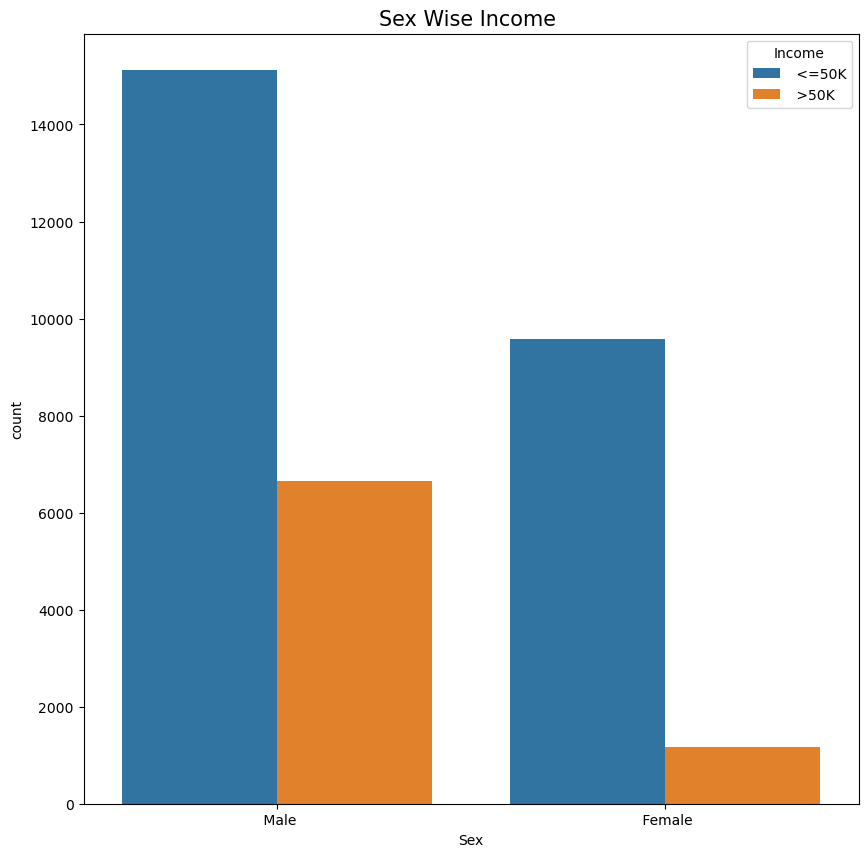

In [170]:
plt.figure(figsize = (10,10))
plt.title("Sex Wise Income " , fontsize =15)
sns.countplot(x =df["Sex"] , hue = df["Income"])
plt.show()

# Obeservation

### Male is a Height Employee in Us and most of people income less than 50k.

In [171]:
Numerical_columns

['Age',
 'Final-weight',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

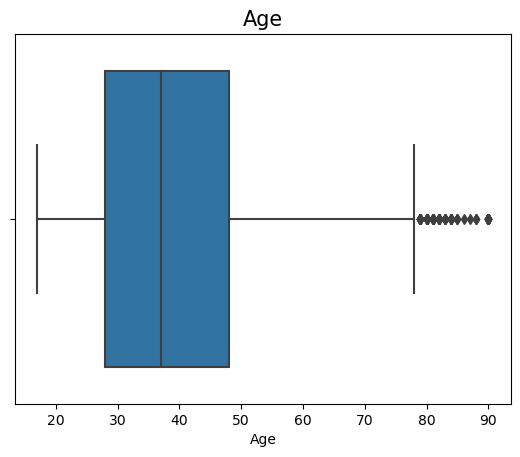

*********************************************************************************************


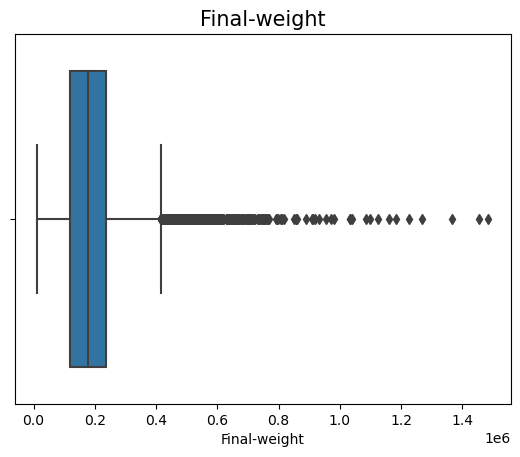

*********************************************************************************************


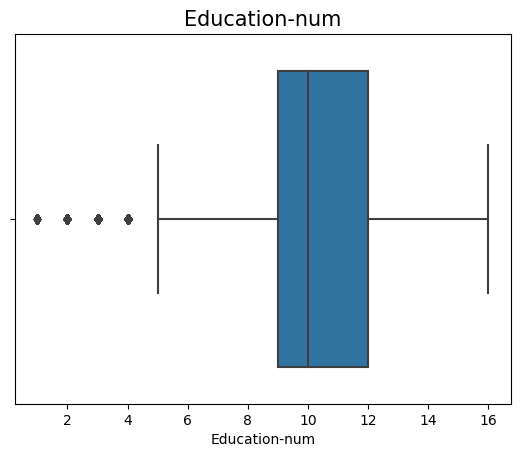

*********************************************************************************************


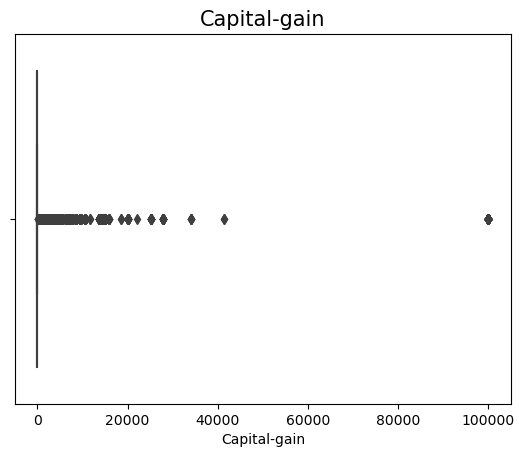

*********************************************************************************************


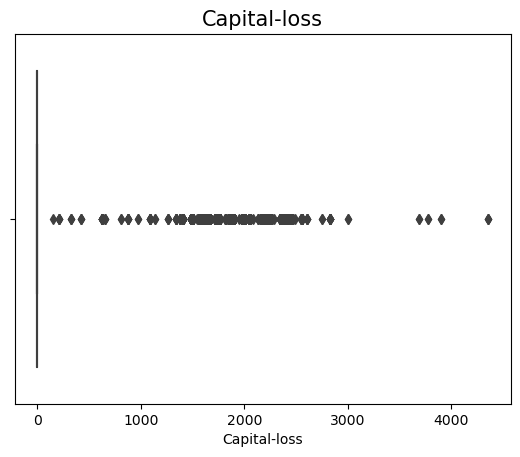

*********************************************************************************************


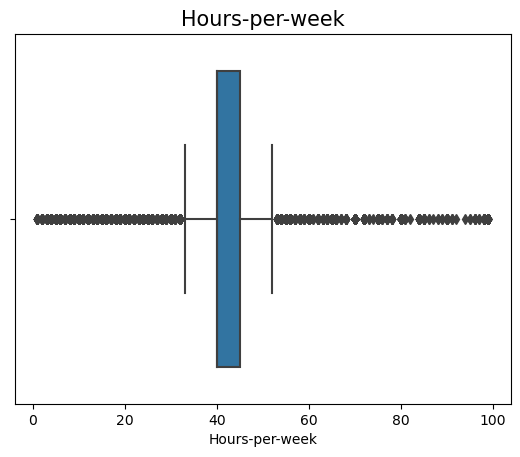

*********************************************************************************************


In [177]:
## Find a Outliers in Numerical_columns

for col in Numerical_columns:
    plt.title(col , fontsize = 15)
    sns.boxplot(x= df[col])
    plt.show()
    print('*********************************************************************************************')

# Obeservation

### Final-weight , Capital-gain , capital-loss , hours-per-week there are many outlies.

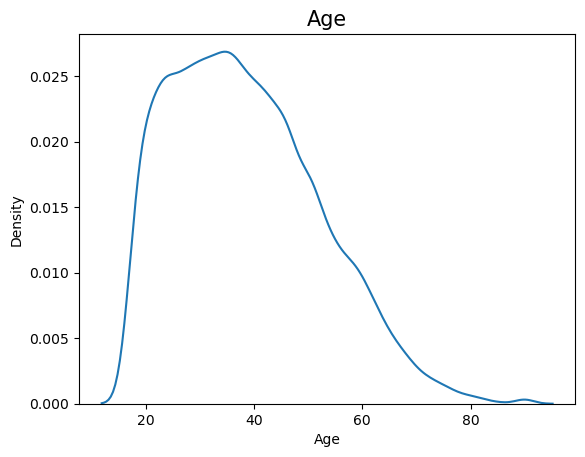

*****************************************************************************************************


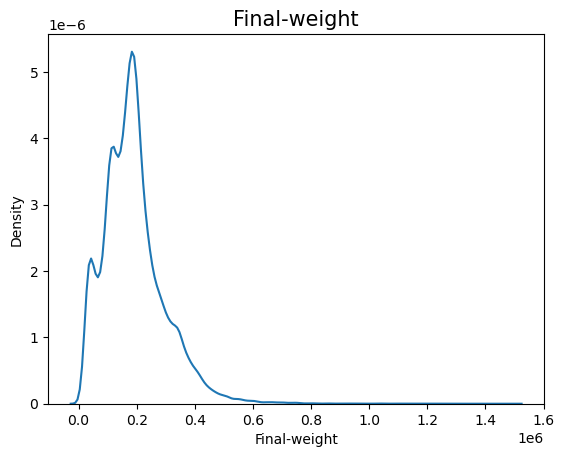

*****************************************************************************************************


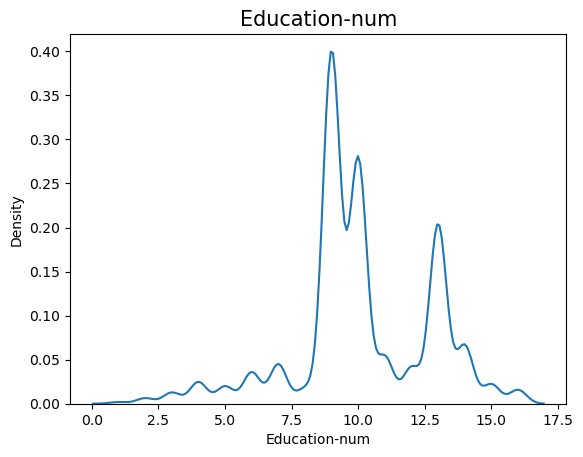

*****************************************************************************************************


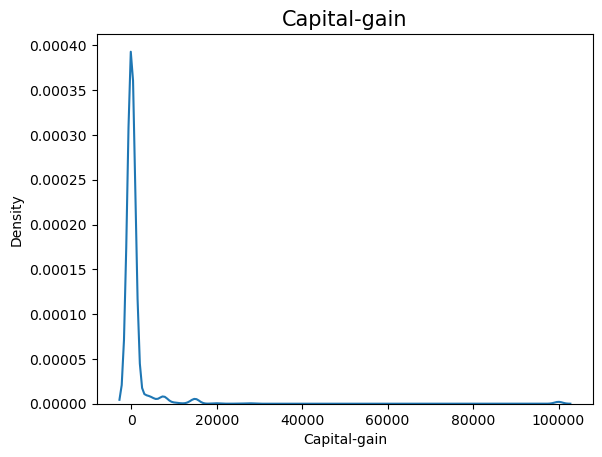

*****************************************************************************************************


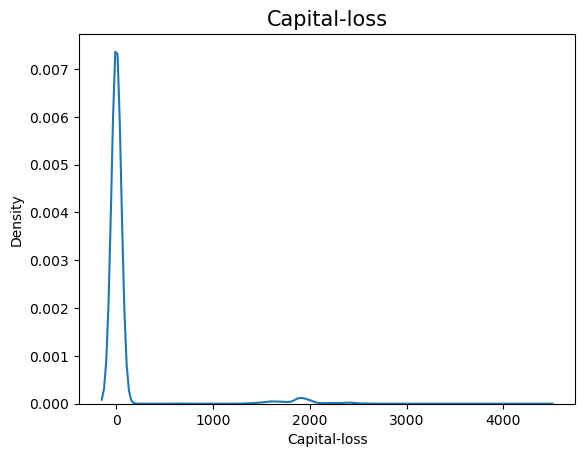

*****************************************************************************************************


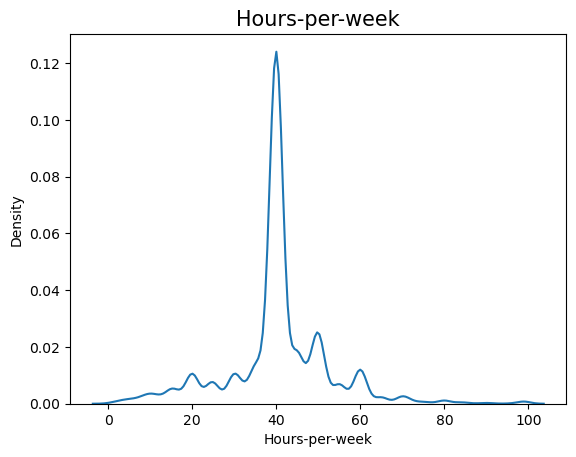

*****************************************************************************************************


In [181]:
for col in Numerical_columns:
    plt.title(col , fontsize = 15)
    sns.kdeplot(x = df[col])
    plt.show()
    print('*****************************************************************************************************')

# Obeservation
### The age column is sightly right-skewed or postively skewed.
### Capital gain and capital loss are mostly 0
### In 'hours-per-week' column, most datapoints are concentrated on 40

<AxesSubplot:>

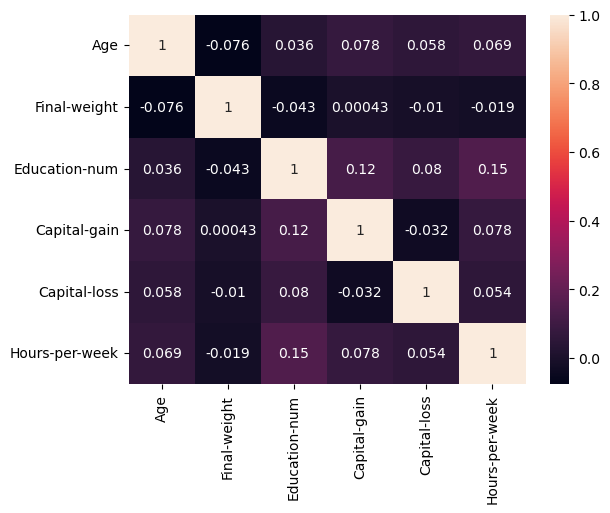

In [189]:
sns.heatmap(df[Numerical_columns].corr() ,  annot = True)